<h1 align='center' style="color: blue;">Fashion MNIST Project</h1>

The aim is to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [3]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


You can also check the version of it using the following code.

In [4]:
import tensorflow as tf
tf.__version__

'2.10.0'

Now, it's time to load the dataset

In [33]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [34]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

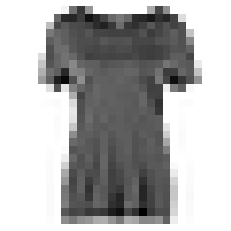

In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [36]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [37]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


Now, it's your turn,

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

 **Step 1. Data Preprocessing Phase**

* **Data preprocessing phase for the train dataset**

In [38]:
#TRANSFORMING THE TRAINING DATA SET FROM 3 DIMENSIONAL TO 2 DIMENSIONAL SHAPE
vol, x_axis, y_axis = X_train.shape
train_transformed_data= X_train.reshape((vol,x_axis*y_axis))
train_transformed_data.shape

(60000, 784)

* **In the code above we observe that we have transformed the 3 - d imensionalshape to 2-dimensional shape**

* **Data preprocess for test dataset**

In [39]:
#TRANSFORMING THE TESTING DATA SET 3 DIMENSIONAL TO 2 DIMENSIONAL SHAPE
vol, x_axis, y_axis = X_train.shape
vol, x_axis, y_axis = X_test.shape
test_transformed_data= X_test.reshape((vol,x_axis*y_axis))
test_transformed_data.shape


(10000, 784)

* **Above can see ,we have transformed 3-d shape to 2-d shape**

**Step 2. Fitting the various Machine learning models**

**Model 1 - Part 1  Fitting the basic linear_model classifier**

In [45]:
#importing the linear_model from scikit learn 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=150,solver='lbfgs',max_iter=70)
#fitting the model on train dataset
classifier.fit(train_transformed_data,y_train)

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=70, random_state=150)

**Model 1 - Evaluating the results of test dataset using LogisticRegression**

In [46]:
#IMPORTING METRICS FOR SCKIKIT LEARN
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [47]:
#HERE WE ARE PREDICTING THE RESULTS FOR THE TEST DATASET
pred_y=classifier.predict(test_transformed_data)

# HERE WE ARE CALCULATING THE ACCURACY, PRECISION, RECALL and AUC 
# FOR THE TEST DATASET
classifier_acc=accuracy_score(y_test, pred_y)
classifier_precision = precision_score(y_test, pred_y, average='macro')
classifier_recall = recall_score(y_test, pred_y, average='macro')
classifier_roc_auc=roc_auc_score(y_test,classifier.predict_proba(test_transformed_data),multi_class='ovr')

print('Logistic regression Accuracy:',classifier_acc)
print('Logistic regression ROC_score:',classifier_roc_auc)
print('Logistic regression Precision:',classifier_precision)
print('Logistic regression Recall:',classifier_recall)

Logistic regression Accuracy: 0.8376
Logistic regression ROC_score: 0.9820224333333332
Logistic regression Precision: 0.836681520687763
Logistic regression Recall: 0.8375999999999999


**Model 2. Training the Naive Bayes Classifier**



In [48]:
#Importing multinomialnaive_bayes classifier from scikit learn 
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha=100)
#fitting the model on train dataset
classifier.fit(train_transformed_data,y_train)

MultinomialNB(alpha=100)

In [49]:
# NAIVE BAYES 
#PREDICTING THE RESULTS OF THE TEST DATASET
pred_y=classifier.predict(test_transformed_data)

# HERE WE ARE CALCULATING THE ACCURACY, PRECISION, RECALL and AUC 
# FOR THE TEST DATASET
classifier_acc=accuracy_score(y_test, pred_y)
classifier_precision = precision_score(y_test, pred_y, average='macro')
classifier_recall = recall_score(y_test, pred_y, average='macro')
classifier_roc_auc=roc_auc_score(y_test,classifier.predict_proba(test_transformed_data),multi_class='ovr')

print('Naive Bayes Accuracy:',classifier_acc)
print('Naive Bayes ROC_score:',classifier_roc_auc)
print('Naive Bayes Precision:',classifier_precision)
print('Naive Bayes Recall:',classifier_recall)

Naive Bayes Accuracy: 0.6555
Naive Bayes ROC_score: 0.8255419722222221
Naive Bayes Precision: 0.6542241740403146
Naive Bayes Recall: 0.6555


**MODEL 3.Training the KNN classifier**

In [50]:
#importing the knn from scikit learn 
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=3)

#fitting the model on train dataset
classifier.fit(train_transformed_data,y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
# KNN
#PREDICTING THE RESULTS OF THE TEST DATASET
pred_y=classifier.predict(test_transformed_data)

# HERE WE ARE CALCULATING THE ACCURACY, PRECISION, RECALL and AUC 
# FOR THE TEST DATASET
classifier_acc=accuracy_score(y_test, pred_y)
classifier_roc_auc=roc_auc_score(y_test,classifier.predict_proba(test_transformed_data),multi_class='ovr')
classifier_precision = precision_score(y_test, pred_y, average='macro')
classifier_recall = recall_score(y_test, pred_y, average='macro')
print('KNN Accuracy:',classifier_acc)
print('KNN ROC_score:',classifier_roc_auc)
print('KNN Precision:',classifier_precision)
print('KNN Recall:',classifier_recall)

KNN Accuracy: 0.8541
KNN ROC_score: 0.9583711777777777
KNN Precision: 0.8575414622679564
KNN Recall: 0.8541000000000001


**MODEL 4.Training the DecisionTree classifier**

In [52]:
#DecisionTree Classifier from scikit learn 
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=32,max_features='sqrt')
#training the model
classifier.fit(train_transformed_data,y_train)

DecisionTreeClassifier(max_features='sqrt', random_state=32)

In [53]:
# Decision Tree
#PREDICTING THE RESULTS OF THE TEST DATASET
pred_y=classifier.predict(test_transformed_data)

# HERE WE ARE CALCULATING THE ACCURACY, PRECISION, RECALL and AUC 
# FOR THE TEST DATASET
classifier_acc=accuracy_score(y_test, pred_y)
classifier_precision = precision_score(y_test, pred_y, average='macro')
classifier_recall = recall_score(y_test, pred_y, average='macro')
classifier_roc_auc=roc_auc_score(y_test,classifier.predict_proba(test_transformed_data),multi_class='ovr')
print('Decision Tree Accuracy:',classifier_acc)
print('Decision Tree ROC_score:',classifier_roc_auc)
print('Decision Tree Precision:',classifier_precision)
print('Decision Tree Recall:',classifier_recall)


Decision Tree Accuracy: 0.7806
Decision Tree ROC_score: 0.8781111111111111
Decision Tree Precision: 0.7818203752640166
Decision Tree Recall: 0.7806000000000001


**MODEL 5 - Training the RandomForest classifier**


In [54]:

#RandomForest Classifier from scikit learn library
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(random_state=24,n_estimators=150,max_depth=25)
#training the model
classifier.fit(train_transformed_data,y_train)

RandomForestClassifier(max_depth=25, n_estimators=150, random_state=24)

In [55]:
#RANDOM FOREST
#PREDICTING THE RESULTS OF THE TEST DATASET
pred_y=classifier.predict(test_transformed_data)

# HERE WE ARE CALCULATING THE ACCURACY, PRECISION, RECALL and AUC 
# FOR THE TEST DATASET
classifier_acc=accuracy_score(y_test, pred_y)
classifier_roc_auc=roc_auc_score(y_test,classifier.predict_proba(test_transformed_data),multi_class='ovr')
classifier_precision = precision_score(y_test, pred_y, average='macro')
classifier_recall = recall_score(y_test, pred_y, average='macro')
print('Random Forest Accuracy:',classifier_acc)
print('Random Forest ROC_score:',classifier_roc_auc)
print('Random Forest Precision:',classifier_precision)
print('Random Forest Recall:',classifier_recall)

Random Forest Accuracy: 0.8768
Random Forest ROC_score: 0.9897017611111112
Random Forest Precision: 0.8758337064445048
Random Forest Recall: 0.8768


According to the interpretation of running the above models, it is preferable to choose the  **Random Forest Classifier** because it is giving good and highest results on the test dataset. 

# **Task 2**

**We are predicting the results for our own fashion images using Random Forest Classifier**

In [115]:
!pip3 install opencv-python
import cv2
#C:\Users\siddh\Downloads\test_images
#To read our own fashion pictures 
Bag =cv2.imread('/Users/siddh/Downloads/test_images/Bag_1.jpeg')
Pullover =cv2.imread('/Users/siddh/Downloads/test_images/Pullover.jpeg')
Shirt =cv2.imread('/Users/siddh/Downloads/test_images/Shirt.jpeg')
Trouser =cv2.imread('/Users/siddh/Downloads/test_images/Trouser.jpeg')
Tshirt=cv2.imread('/Users/siddh/Downloads/test_images/Tshirt.jpeg')
B1 =cv2.imread('/Users/siddh/Downloads/test_images/Bag_1.jpeg')

#Reshaping the above images into a square format of (28,28) dimensions
Bag =cv2.resize(Bag,(28,28))
Pullover =cv2.resize(Pullover,(28,28))
Shirt =cv2.resize(Shirt,(28,28))
Trouser =cv2.resize(Trouser,(28,28))
Tshirt=cv2.resize(Tshirt,(28,28))

**Changing the Coloured images into a  GrayScale image format**

In [118]:
Bag_img = cv2.cvtColor(Bag,cv2.COLOR_BGR2GRAY)
Pullover_img = cv2.cvtColor(Pullover,cv2.COLOR_BGR2GRAY)
Shirt_img = cv2.cvtColor(Shirt,cv2.COLOR_BGR2GRAY)
Trouser_img = cv2.cvtColor(Trouser,cv2.COLOR_BGR2GRAY)
Tshirt_img = cv2.cvtColor(Tshirt,cv2.COLOR_BGR2GRAY)

**To display all images**

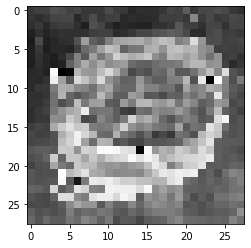

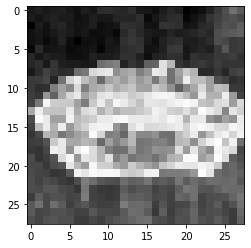

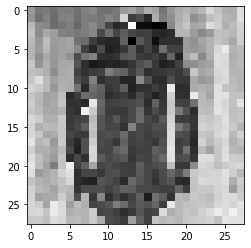

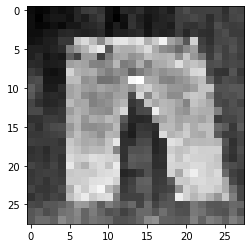

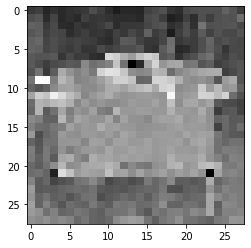

In [120]:
import matplotlib.pyplot as plt
plt.imshow(Bag_img, cmap='binary')
plt.axis('on')
plt.show()

plt.imshow(Pullover_img, cmap='binary')
plt.axis('on')
plt.show()

plt.imshow(Shirt_img, cmap='binary')
plt.axis('on')
plt.show()

plt.imshow(Trouser_img, cmap='binary')
plt.axis('on')
plt.show()

plt.imshow(Tshirt_img, cmap='binary')
plt.axis('on')
plt.show()


**Transforming the 3-D images to 2-D Images**

In [102]:
x_axis, y_axis,vol = Bag.shape
Bag_2 = Bag.reshape((vol,x_axis*y_axis))

x_axis, y_axis,vol = Pullover.shape
Pullover_2= Pullover.reshape((vol,x_axis*y_axis))

x_axis, y_axis,vol = Shirt.shape
Shirt_2 = Shirt.reshape((vol,x_axis*y_axis))

x_axis, y_axis,vol = Trouser.shape
Trouser_2 = Trouser.reshape((vol,x_axis*y_axis))

x_axis, y_axis,vol = Tshirt.shape
Tshirt_2 = Tshirt.reshape((vol,x_axis*y_axis))



**Predicting the Fashion pieces using RandomForest**

In [103]:
#Predicting Bag picture
sol1=classifier.predict(Bag_2)
print('solution1 :',class_names[sol1[0]])


solution1 : Bag


In [104]:
#Predicting Pullover picture
sol2=classifier.predict(Pullover_2)
print('solution2 :',class_names[sol2[0]])

solution2 : Bag


In [105]:
#Predicting Shirt picture
sol3=classifier.predict(Shirt_2)
print('solution3 :',class_names[sol3[0]])


solution3 : Bag


In [106]:
#Predicting Trouser picture
sol4=classifier.predict(Trouser_2)
print('solution4 :',class_names[sol4[0]])

solution4 : Bag


In [109]:
#Predicting T_Shirt picture
sol5=classifier.predict(Tshirt_2)
print('solution5 :',class_names[sol5[0]])

solution5 : Bag


**Inference - The Machine learning model is predicting the bag image correctly and classifying all other images also with the same class. This could be because of the small size of the image and limitations of the conventional machine learning models. Deep learning is the ideal choice for computer vision and therefore models like CNN would be the best fit**